<a href="https://colab.research.google.com/github/Praveen76/Fashion-MNIST-Classification-using-Dense-Neural-Network/blob/main/Fashion_MNIST_Classification_using_Dense_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
# !pip -qq install catboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
# import json
# import os

# # Set the Kaggle API key path
# kaggle_key_path = '/content/drive/MyDrive/DS_Learning/.kaggle/kaggle.json'
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/DS_Learning/.kaggle'

# # Check if the key is correctly set
# with open(kaggle_key_path, 'r') as kaggle_key_file:
#     kaggle_key_data = json.load(kaggle_key_file)
#     print(f'Kaggle API username: {kaggle_key_data["username"]}')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, InputLayer, Conv1D, ReLU, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import Input
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
# Using Keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

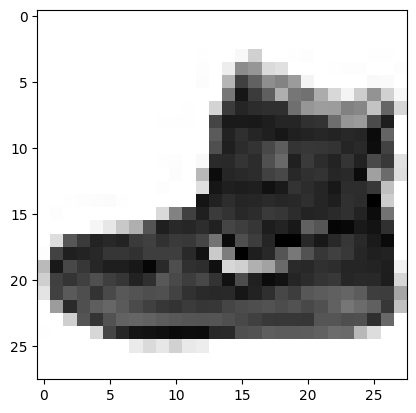

In [ ]:
plt.imshow(X_train_full[0], cmap='Greys')

Label:  9


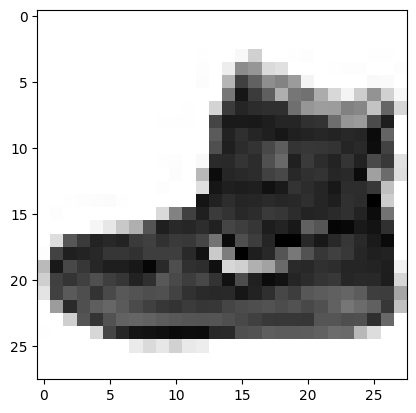

In [ ]:
# Visualize an image from data
print("Label: ", y_train_full[0])
plt.imshow(X_train_full[0], cmap='Greys')
plt.show()

In [ ]:
# Shape and datatype of X_train
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
# Shape and datatype of y_train
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [ ]:
# Split into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=123)
X_train.shape, X_val.shape

((54000, 28, 28), (6000, 28, 28))

In [ ]:
# Reshape train, test, and validation data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [ ]:
# Normalize dataset
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [ ]:
# unique classes
pd.Series(y_train).nunique()

10

Use the sequential API to make a model with the following dense layers:

* i. layer-1: 128 neurons, relu activation

* ii. layer-2: X neurons, softmax activation (Deduce the value of X based on the number of classes in the MNIST fashion dataset)

* iii. Define the input_shape=(None, Y) for the model. Deduce Y from the dataset

* iV. Plot the model (plot_model())

In [ ]:
seq_model = keras.Sequential()
seq_model.add(Flatten(input_shape=(28, 28)))
seq_model.add(Dense(128, activation="relu"))
seq_model.add(Dense(10, activation="softmax"))

In [ ]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


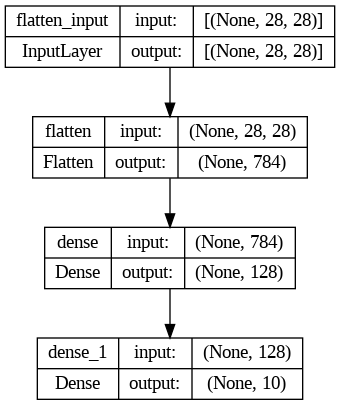

In [ ]:
plot_model(seq_model, show_shapes=True)

In [ ]:
seq_model.compile(optimizer ="rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
callbacks_list = [EarlyStopping(monitor="val_loss", patience=2),
                  ModelCheckpoint("mnist_model_checkpoint",save_best_only=True),
                  TensorBoard(log_dir="/tensorboard_files")]

In [ ]:
history = seq_model.fit(x=X_train, y=y_train, epochs=10,
                    validation_data=(X_val, y_val),
                   callbacks=callbacks_list,)

Epoch 1/10
1677/1688 [============================>.] - ETA: 0s - loss: 0.5189 - accuracy: 0.8167

1688/1688 [==============================] - 7s 4ms/step - loss: 0.5185 - accuracy: 0.8168 - val_loss: 0.4396 - val_accuracy: 0.8342
Epoch 2/10
1687/1688 [============================>.] - ETA: 0s - loss: 0.3843 - accuracy: 0.8614

1688/1688 [==============================] - 6s 4ms/step - loss: 0.3843 - accuracy: 0.8614 - val_loss: 0.3570 - val_accuracy: 0.8738
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3507 - accuracy: 0.8734 - val_loss: 0.4013 - val_accuracy: 0.8577
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3300 - accuracy: 0.8812 - val_loss: 0.3616 - val_accuracy: 0.8737


In [ ]:
predictions = np.argmax(seq_model.predict(X_test[:5]), axis=1)
print(predictions)

1/1 [==============================] - 0s 92ms/step
[9 2 1 1 0]


In [ ]:
data = pd.DataFrame(history.history)
data.head()

,loss,accuracy,val_loss,val_accuracy
0,0.518480,0.816796,0.439601,0.834167
1,0.384272,0.861444,0.357009,0.873833
2,0.350737,0.873389,0.401332,0.857667
3,0.330038,0.881167,0.361575,0.873667


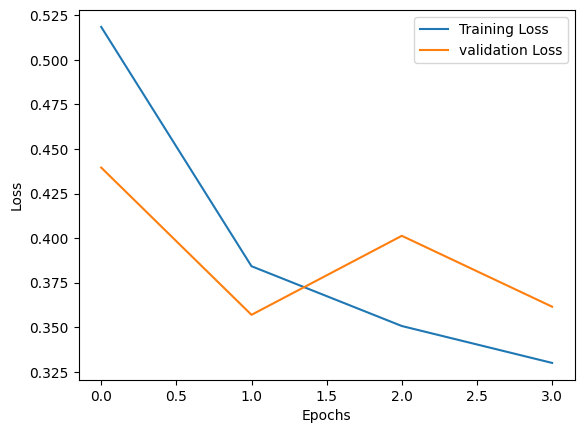

In [ ]:
plt.plot(range(data.shape[0]),data['loss'], label="Training Loss")
plt.plot(range(data.shape[0]),data['val_loss'],label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
class_predicted = np.argmax(seq_model.predict(X_test),axis=1)
accuracy = np.sum(class_predicted == y_test)/len(y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step
0.8598


In [ ]:
print(classification_report(y_test, class_predicted))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.67      0.87      0.76      1000
           3       0.88      0.88      0.88      1000
           4       0.83      0.66      0.73      1000
           5       0.97      0.95      0.96      1000
           6       0.75      0.47      0.58      1000
           7       0.94      0.94      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [ ]:
print(confusion_matrix(y_test, class_predicted))

[[917   1  22  15   2   1  30   0  12   0]
 [  3 973   1  17   1   0   3   0   2   0]
 [ 22   2 872  13  51   0  37   0   3   0]
 [ 40  23  15 882  19   0  16   0   5   0]
 [  1   5 218  51 657   0  65   0   3   0]
 [  0   0   0   0   0 948   0  28   1  23]
 [257   3 160  25  63   0 469   0  23   0]
 [  0   0   0   0   0  16   0 939   0  45]
 [  4   1   5   5   1   4   2   5 973   0]
 [  0   0   0   0   0   4   1  27   0 968]]


In [ ]:
# Use the functional API to make this model. You can use any shape for the layers. Use the plot_model() utility to show the model graph.

inputs = Input(shape=(28,28), name="input_layer")
input_flattened = Flatten()(inputs)
features = Dense(128, activation="relu",name="first_layer")(input_flattened) #f(inputs)
outputs = Dense(10, activation="softmax",
                             name="output_layer")(features) #f(features)
fun_model = keras.Model(inputs,outputs)

In [ ]:
fun_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 first_layer (Dense)         (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


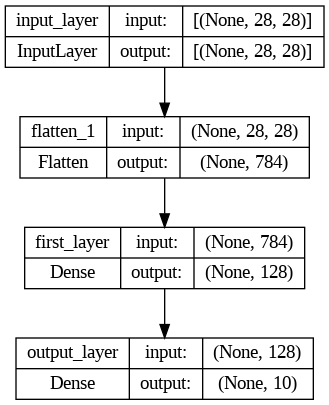

In [ ]:
plot_model(fun_model, show_shapes=True)

In [ ]:
fun_model.compile(optimizer ="rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
history = fun_model.fit(x=X_train, y=y_train, epochs=10,
                    validation_data=(X_val, y_val))#,
                   #callbacks=callbacks_list,)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5205 - accuracy: 0.8137 - val_loss: 0.4219 - val_accuracy: 0.8485
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3854 - accuracy: 0.8607 - val_loss: 0.3800 - val_accuracy: 0.8668
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3508 - accuracy: 0.8733 - val_loss: 0.3397 - val_accuracy: 0.8803
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3303 - accuracy: 0.8826 - val_loss: 0.3696 - val_accuracy: 0.8730
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3167 - accuracy: 0.8864 - val_loss: 0.3267 - val_accuracy: 0.8885
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3032 - accuracy: 0.8912 - val_loss: 0.3235 - val_accuracy: 0.8888
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8949 - val_loss: 0.3398 - val_accuracy:

In [ ]:
data = pd.DataFrame(history.history)
data.head(11)

,loss,accuracy,val_loss,val_accuracy
0,0.520494,0.813685,0.421887,0.848500
1,0.385389,0.860685,0.379983,0.866833
2,0.350790,0.873259,0.339743,0.880333
3,0.330254,0.882574,0.369633,0.873000
4,0.316656,0.886444,0.326685,0.888500
5,0.303238,0.891167,0.323489,0.888833
6,0.294344,0.894889,0.339758,0.882167
7,0.286129,0.898944,0.358392,0.882833
8,0.278855,0.901444,0.331386,0.889000
9,0.271929,0.905852,0.316504,0.901500


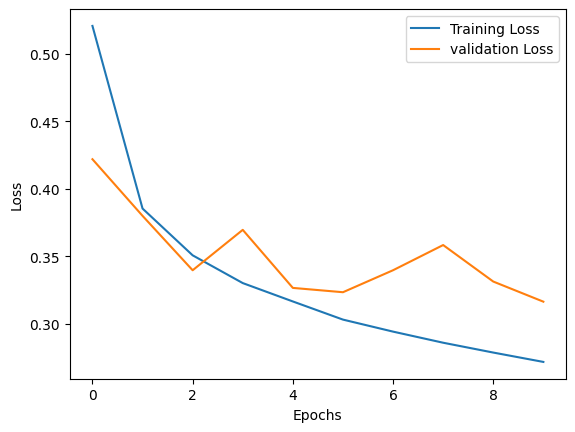

In [ ]:
plt.plot(range(data.shape[0]),data['loss'], label="Training Loss")
plt.plot(range(data.shape[0]),data['val_loss'],label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()